# Bike Sharing Dataset

## Company : Boom Bikes

### Done by : Sai Sasanka L V

In [1]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


In [2]:
# loading the dataset

boom_df = pd.read_csv("day.csv")
boom_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Looking for datatypes and missing values

boom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* No Missing values

* Looking at columns like 'dteday' which is a date column : could be converted to datetime format if necessary

* Rest of the info looks okay

In [4]:
boom_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### EDA

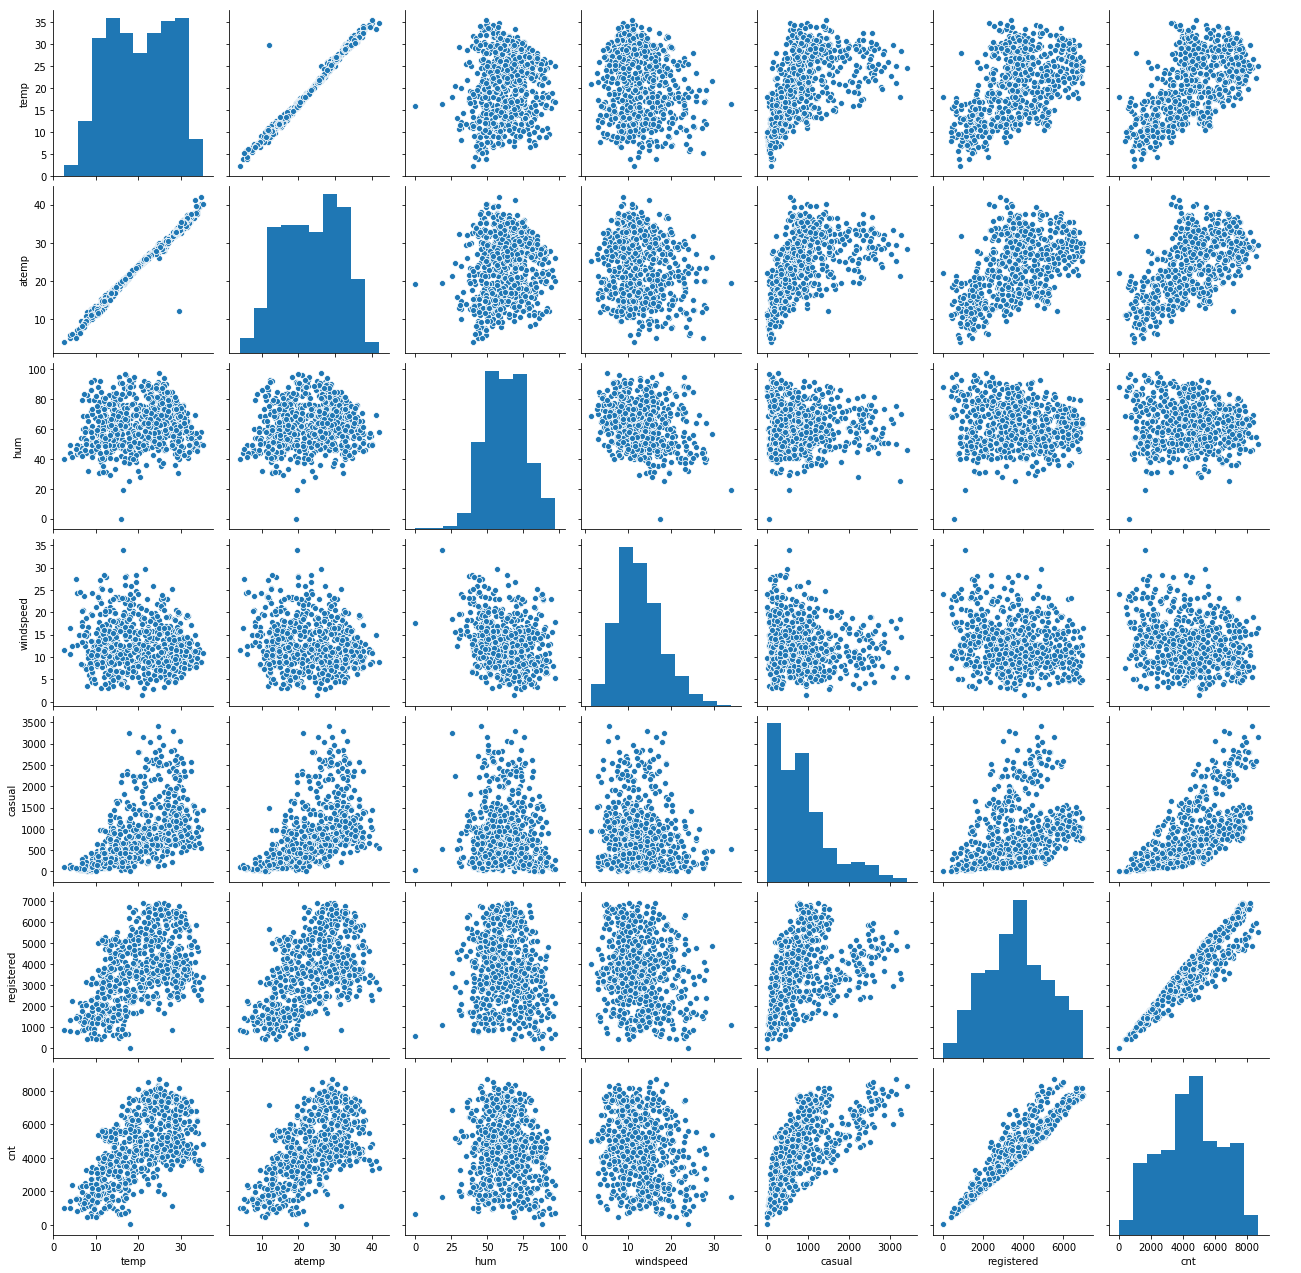

In [5]:
# Looking at pairplots of continuous variables to check for any patterns

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

sns.pairplot(boom_df[numeric_cols])
plt.show()

#### Points to Note :

 - To know if linear regression can be applied to the dataset, we need to know if there is any positive trend between atleast a few of the independent variables with the dependent variable
 
 - 'atemp' and 'temp' also indicate a positive trend with 'cnt'
 
 - looking at 'hum' and 'cnt' plot, there is a very slight negative trend.
 
 We would have to drop `causal` and `registered` as we are considering `cnt` as the target variable
 
 We can justify our assumptions with a correlation heat map

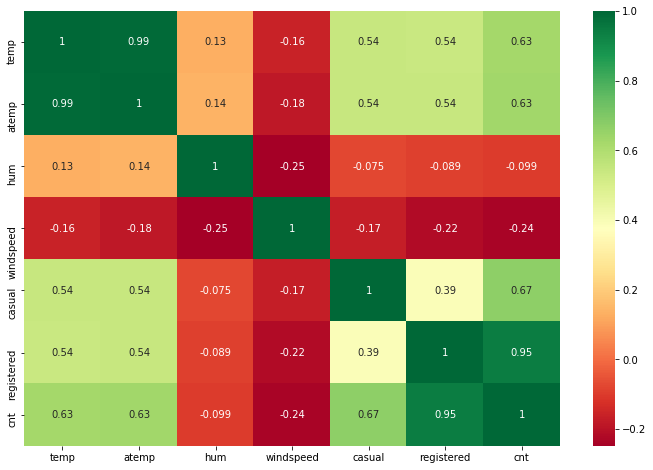

In [6]:
# Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(boom_df[numeric_cols].corr(), cmap="RdYlGn", annot=True)
plt.show()

We can see now that our assumptions made with the scatter plots are justified. 

- 'temp' and 'atemp' have a positive correlation of 0.63 with 'cnt'
- another point to note is that 'temp' and 'atemp' are highly correlated : 0.99 (almost 1 !)
- 'hum' and 'cnt' have a slight negative correlation : -0.24

#### Visualizing Categorical Variables

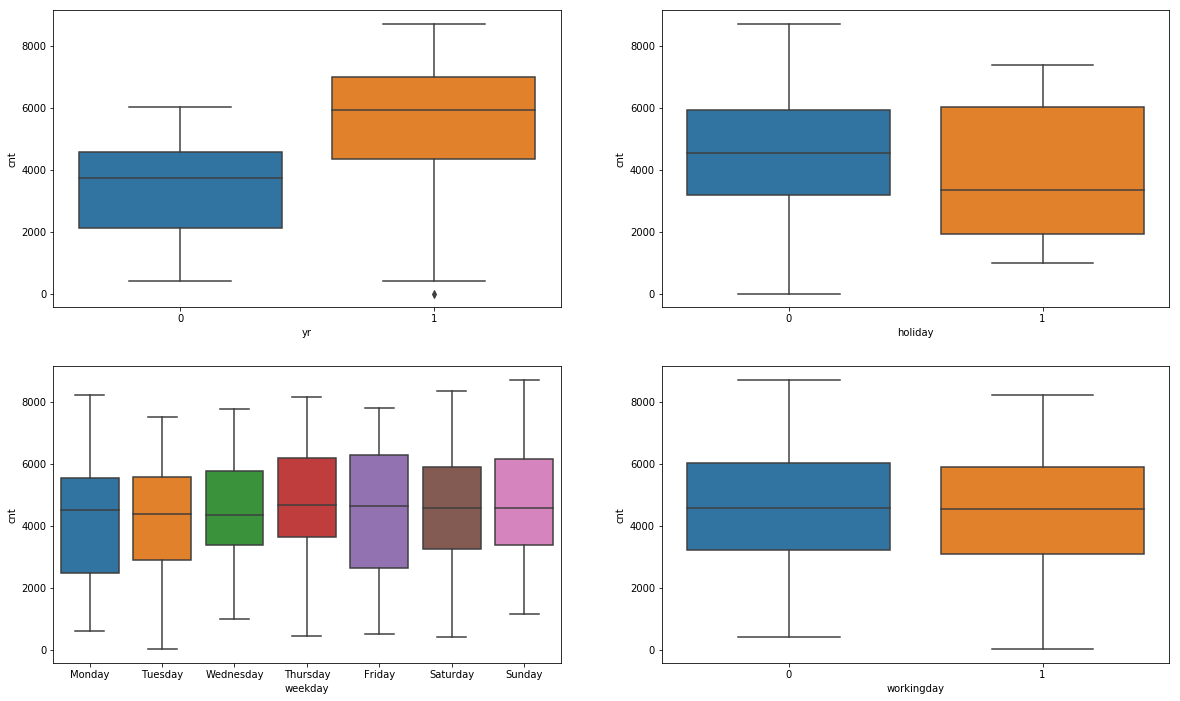

In [7]:
# Using boxplots to get some insights with categorical columns

cat_cols = ['yr', 'mnth', 'holiday', 'weekday', 'workingday'] # --> not including 'season' and 'weathersit' for now

plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='yr', y='cnt', data=boom_df)

plt.subplot(2, 2, 2)
sns.boxplot(x='holiday', y='cnt', data=boom_df)

boom_df['weekday'] = boom_df.weekday.map({0:"Sunday", 1:"Monday", 2: "Tuesday", 3: "Wednesday", 
                                          4: "Thursday", 5: "Friday", 6:"Saturday"})

plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='cnt', data=boom_df)

plt.subplot(2, 2, 4)
sns.boxplot(x='workingday', y='cnt', data=boom_df)

plt.show()

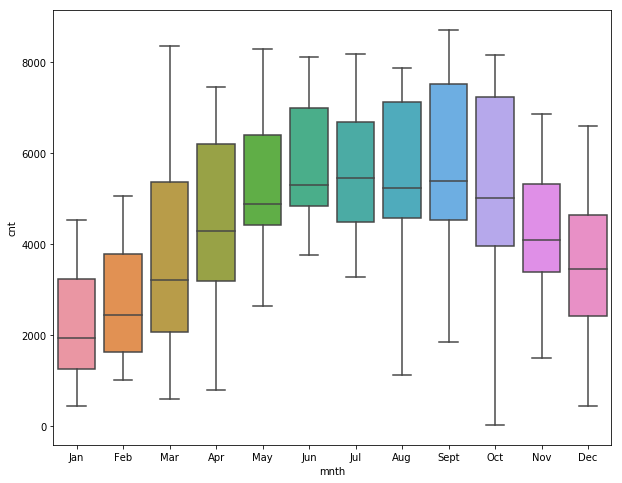

In [8]:
# Looking at the mnth column and cnt column box plot

boom_df['mnth'] = boom_df.mnth.map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

plt.figure(figsize=(10, 8))
sns.boxplot(x='mnth', y='cnt', data=boom_df)
plt.show()

#### Points to note :

 - 'cnt' is greater in the year 2019 indicating more bikes have been rented in 2019 than in 2018. That means that the sales have increased by the year. `yr` might be a good predictor
 
 - as for 'holiday' vs 'cnt' we can see that the median for 'cnt' on a holiday is less than that on not a holiday. But if we observe the 75th percentile is almost the same
 
 - for 'weekday' vs 'cnt' all the medians are in the range of 4000 - 6000 indicating the rental counts are almost alike on all days of the week, but looking at the 75th percentile it is kind of higher on weekends
 
 - for 'workingday' vs 'cnt', both the plots are almost alike, which might indicate that the rental counts are alike on working and non working days as well
 
 - For 'mnth' vs 'cnt', the rental count gets higher gradually starting from march till september but lets look at this with 'yr' as hue

In [9]:
# Replacing 0 with 2018 and 1 with 2019 in the 'yr' column for better interpretation

boom_df['yr_mod'] = np.where(boom_df.yr == 0, 2018, 2019)
boom_df.yr_mod.value_counts()

2019    365
2018    365
Name: yr_mod, dtype: int64

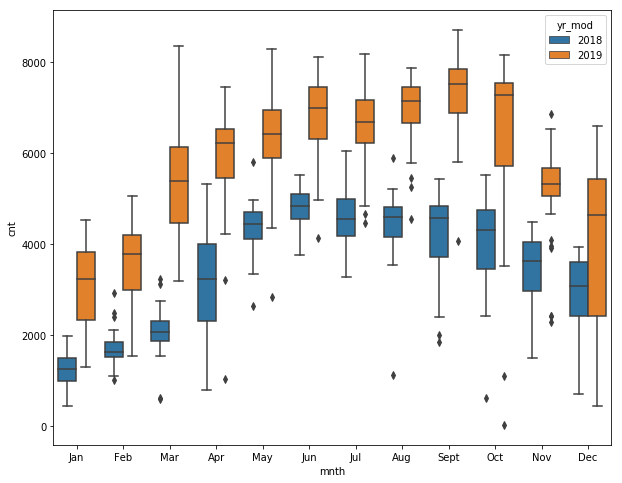

In [10]:
# Plotting 'mnth' vs 'cnt' box plot with 'yr' as hue

plt.figure(figsize=(10, 8))
sns.boxplot(x='mnth', y='cnt', data=boom_df, hue='yr_mod')
plt.show()

'mnth' vs 'cnt' follows the same trend in both 2018 and 2019 but 'cnt' is significantly higher in the year 2019

### Data Preparation

#### Points to Note :

* 'weathersit' and 'season' columns appear to have ordinal data but looking at the data dictionary the significance for the values seem to have no order

* Weathersit value significance:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* Season value significance:
    - 1:spring
    - 2:summer
    - 3:fall
    - 4:winter
    
* Both of them have to be converted from ordinal to cardinal but better model interpretation

In [11]:
# Replacing the values in 'season' column with the appropriate significance
# as provided in the data dictionary

boom_df['season'] = np.select(
    [
        boom_df.season == 1,
        boom_df.season == 2,
        boom_df.season == 3, 
        boom_df.season == 4
    ], ['spring', 'summer', 'fall', 'winter'])
boom_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# Replacing the values in 'weathersit' column with the appropriate significance
# as provided in the data dictionary

"""
Using the below values for conversion as
the values provided in the data dictionary are very lengthy

'Clear + Cloudy',
'Mist + Cloudy', 
'LightRain + Cloudy',
'HeavyRain + Thunderstorm'

"""
boom_df['weathersit'] = np.select(
    [
        boom_df.weathersit == 1,
        boom_df.weathersit == 2,
        boom_df.weathersit == 3, 
        boom_df.weathersit == 4
    ], 
    ['Clear + Cloudy',
     'Mist + Cloudy', 
     'LightRain + Cloudy',
     'HeavyRain + Thunderstorm'
    ])
boom_df.weathersit.value_counts()

Clear + Cloudy        463
Mist + Cloudy         246
LightRain + Cloudy     21
Name: weathersit, dtype: int64

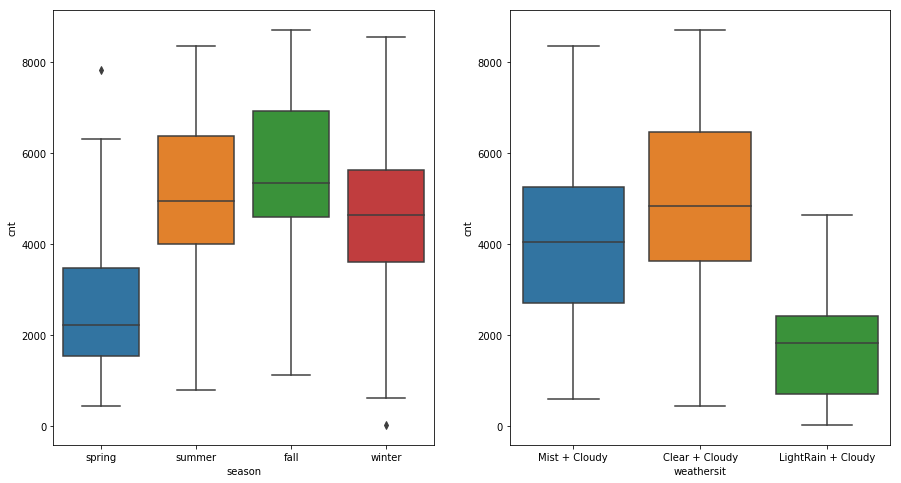

In [13]:
# Looking at box plots for 'weathersit' and 'season' with 'cnt'

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='cnt', data=boom_df)

plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='cnt', data=boom_df)

plt.show()

#### Points to Note:

 - for 'season' vs 'cnt', the rental count was higher for summer and fall seasons
 
 - for 'weathersit' vs 'cnt', the rental count was higher for Clear or Slightly cloudy weather conditions and obviously during rainy conditions the rental count is lower
 

### Dummy Variables

In [14]:
# Creating a function for getting the dummy columns

def create_dummies(df, col_name):
    
    dummy_cols = pd.get_dummies(df[col_name], drop_first=True)
    
    df = pd.concat([df, dummy_cols], axis=1)
    
    df = df.drop(columns=[col_name])
    
    return df

In [15]:
# Creating dummy variables for categorical columns

boom_df = create_dummies(boom_df, "weathersit")
boom_df = create_dummies(boom_df, "weekday")
boom_df = create_dummies(boom_df, "mnth")

boom_df.head()

instant      dteday  season  yr  holiday  workingday       temp     atemp  \
0        1  01-01-2018  spring   0        0           1  14.110847  18.18125   
1        2  02-01-2018  spring   0        0           1  14.902598  17.68695   
2        3  03-01-2018  spring   0        0           1   8.050924   9.47025   
3        4  04-01-2018  spring   0        0           1   8.200000  10.60610   
4        5  05-01-2018  spring   0        0           1   9.305237  11.46350   

       hum  windspeed  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept  
0  80.5833  10.749882  ...    0    0    1    0    0    0    0    0    0     0  
1  69.6087  16.652113  ...    0    0    1    0    0    0    0    0    0     0  
2  43.7273  16.636703  ...    0    0    1    0    0    0    0    0    0     0  
3  59.0435  10.739832  ...    0    0    1    0    0    0    0    0    0     0  
4  43.6957  12.522300  ...    0    0    1    0    0    0    0    0    0     0  

[5 rows x 33 columns]

In [16]:
# Creating dummy separately for 'season'. 
# we would drop 'spring' column as we can indicate it by using other dummy columns

season_dum = pd.get_dummies(boom_df["season"])

season_dum = season_dum.drop(columns=["spring"])

boom_df = pd.concat([boom_df, season_dum], axis=1)

boom_df.drop(columns=["season"], inplace=True)

boom_df.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           1  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           1  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Jul  Jun  Mar  May  Nov  Oct  Sept  fall  summer  \
0  10.749882     331  ...    0    0    0    0    0    0     0     0       0   
1  16.652113     131  ...    0    0    0    0    0    0     0     0       0   
2  16.636703     120  ...    0    0    0    0    0    0     0     0       0   
3  10.739832     108  ...    0    0    0    0    0    0     0     0       0   
4  12.522300      82  ...    0    0    0    0    0    0     0     0       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 35 columns]

In [17]:
# Dropping season and weathersit columns as dummy variables are present
# and a few other unwanted columns

boom_df_2 = boom_df.drop(columns=['instant', 'dteday', 'yr_mod', 'casual', 'registered'])
boom_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   LightRain + Cloudy  730 non-null    uint8  
 9   Mist + Cloudy       730 non-null    uint8  
 10  Monday              730 non-null    uint8  
 11  Saturday            730 non-null    uint8  
 12  Sunday              730 non-null    uint8  
 13  Thursday            730 non-null    uint8  
 14  Tuesday             730 non-null    uint8  
 15  Wednesday           730 non-null    uint8  
 16  Aug     

In [18]:
boom_df_2.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   LightRain + Cloudy  Mist + Cloudy  ...  Jul  Jun  Mar  May  Nov  Oct  Sept  \
0                   0              1  ...    0    0    0    0    0    0     0   
1                   0              1  ...    0    0    0    0    0    0     0   
2                   0              0  ...    0    0    0    0    0    0     0   
3                   0              0  ...    0    0    0    0    0    0     0   
4                   0              0  ...    0    0    0    0    0    0     0   

   fall  summer  winter  
0     0       0       0  
1     0       0       0  
2     0       0       0  
3     0       0       0  
4     0       0       0  

[5 rows x 30 columns]

In [19]:
boom_df_2.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt  LightRain + Cloudy  Mist + Cloudy  ...  \
count  730.000000   730.000000          730.000000     730.000000  ...   
mean    12.763620  4508.006849            0.028767       0.336986  ...   
std      5.195841  1936.011647            0.167266       0.473004  ...   
min      1.500244    22.000000            0.000000       0.000000  ...   
25%      9.041650  3169.750000            0.000000       0.000000  ...   
50%     12.125325  4548.500000            0.000000       0.000000  ...   
75%     15.625589  5966.000000            0.000000       1.000000  ...   
max     34.000021  8714.000000            1.000000       1.000000  ...   

              Jul         Jun         Mar         May         Nov         Oct  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.084932    0.082192    0.084932    0.084932    0.082192    0.084932   
std      0.278971    0.274845    0.278971    0.278971    0.274845    0.278971   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Sept        fall      summer      winter  
count  730.000000  730.000000  730.000000  730.000000  
mean     0.082192    0.257534    0.252055    0.243836  
std      0.274845    0.437576    0.434490    0.429689  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

### Splitting the data into training and test set

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(100)
boom_train, boom_test = train_test_split(boom_df_2, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling features

 - We can notice that casual, registered and price are on a different scale than the other numeric columns by looking at the medians from the describe output
 - Hence we should consider scaling for better modelling

In [21]:
# Using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [22]:
numeric_cols = list(set(numeric_cols) - {'casual', 'registered'})

boom_train[numeric_cols] = scaler.fit_transform(boom_train[numeric_cols])
boom_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  LightRain + Cloudy  Mist + Cloudy  ...  Jul  Jun  Mar  May  \
653  0.864243                   0              0  ...    0    0    0    0   
576  0.827658                   0              0  ...    1    0    0    0   
426  0.465255                   0              1  ...    0    0    1    0   
728  0.204096                   0              0  ...    0    0    0    0   
482  0.482973                   0              1  ...    0    0    0    0   

     Nov  Oct  Sept  fall  summer  winter  
653    0    1     0     0       0       1  
576    0    0     0     1       0       0  
426    0    0     0     0       0       0  
728    0    0     0     0       0       0  
482    0    0     0     0       1       0  

[5 rows x 30 columns]

In [23]:
boom_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  LightRain + Cloudy  Mist + Cloudy  ...  \
count  510.000000  510.000000          510.000000     510.000000  ...   
mean     0.320768    0.513620            0.029412       0.343137  ...   
std      0.169797    0.224593            0.169124       0.475223  ...   
min      0.000000    0.000000            0.000000       0.000000  ...   
25%      0.199179    0.356420            0.000000       0.000000  ...   
50%      0.296763    0.518638            0.000000       0.000000  ...   
75%      0.414447    0.684710            0.000000       1.000000  ...   
max      1.000000    1.000000            1.000000       1.000000  ...   

              Jul         Jun         Mar         May         Nov         Oct  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.074510    0.098039    0.084314    0.086275    0.086275   
std      0.266010    0.262857    0.297660    0.278131    0.281045    0.281045   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Sept        fall      summer     winter  
count  510.000000  510.000000  510.000000  510.00000  
mean     0.080392    0.262745    0.245098    0.24902  
std      0.272166    0.440557    0.430568    0.43287  
min      0.000000    0.000000    0.000000    0.00000  
25%      0.000000    0.000000    0.000000    0.00000  
50%      0.000000    0.000000    0.000000    0.00000  
75%      0.000000    1.000000    0.000000    0.00000  
max      1.000000    1.000000    1.000000    1.00000  

[8 rows x 30 columns]

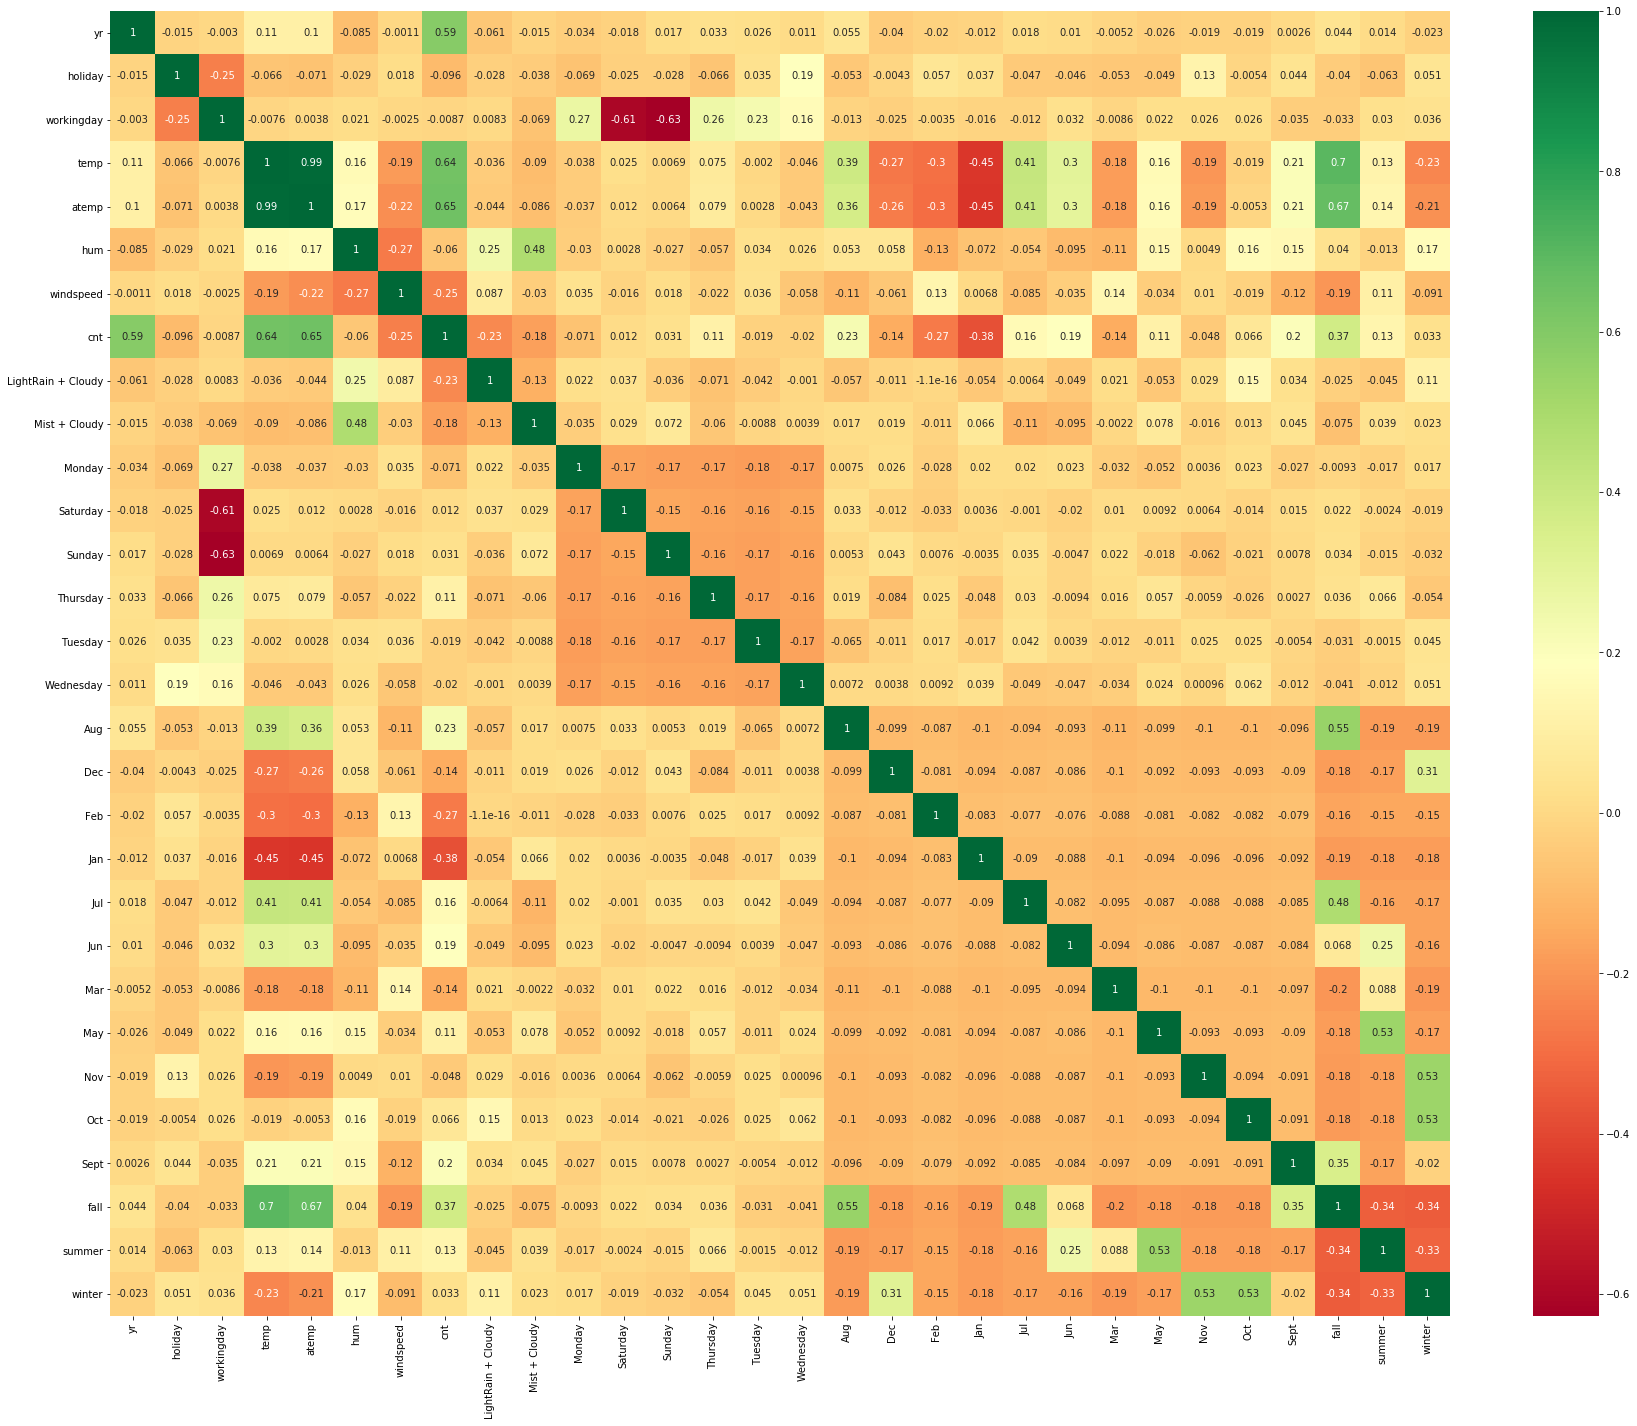

In [24]:
# Checking the correlation for the variables in the training set

plt.figure(figsize = (30, 24))
sns.heatmap(boom_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

- We can see that `temp`, `atemp` and `yr` are the ones with high correlation with `cnt`

- `spring` column has a noticeable negative correlation with `cnt`

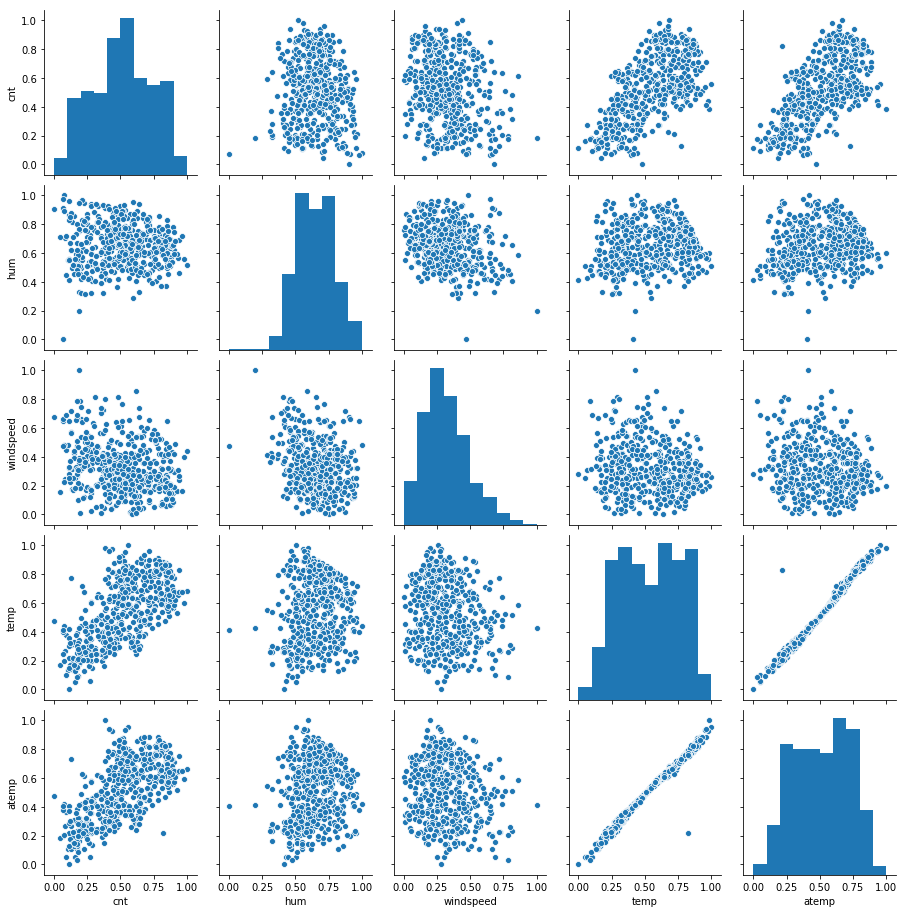

In [25]:
# Looking at the pairplots

sns.pairplot(boom_train[numeric_cols])
plt.show()

We can see that `cnt` is most correlated with `temp` and `atemp`

#### Dividing into sets of X and Y

In [26]:
y_train = boom_train.pop('cnt')
X_train = boom_train

### Model Building

We would be using RFE (recursive feature elimination) for building the model and then we would manually drop or add features to get the best fit model

In [27]:
# Importing the required libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [28]:
# Using RFE to obtain 15 features

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('LightRain + Cloudy', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [30]:
# Obtaining columns where RFE support is present

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'LightRain + Cloudy',
       'Mist + Cloudy', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept', 'fall', 'summer',
       'winter'],
      dtype='object')

In [31]:
# Obtaining columns where RFE support is absent

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [32]:
# Making a new df with rfe support features

X_train_RFE = X_train[X_train.columns[rfe.support_]]
X_train_RFE.head()

yr  holiday      temp       hum  windspeed  LightRain + Cloudy  \
653   1        0  0.509887  0.575354   0.300794                   0   
576   1        0  0.815169  0.725633   0.264686                   0   
426   1        0  0.442393  0.640189   0.255342                   0   
728   1        0  0.245101  0.498067   0.663106                   0   
482   1        0  0.395666  0.504508   0.188475                   0   

     Mist + Cloudy  Dec  Jan  Jul  Nov  Sept  fall  summer  winter  
653              0    0    0    0    0     0     0       0       1  
576              0    0    0    1    0     0     1       0       0  
426              1    0    0    0    0     0     0       0       0  
728              0    1    0    0    0     0     0       0       0  
482              1    0    0    0    0     0     0       1       0

We'll be using the above RFE dataframe to build models. We will be primarily judging the significance of the features using p-value and VIF and dropping or adding the features to the models accordingly

In [33]:
# Creating methods for calculating VIF and building model
# as we would use these iteratively

def calculate_VIF(df):
    
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


def fit_model(X, y):
    
    X_const = sm.add_constant(X)
    lm = sm.OLS(y, X_const).fit()
    
    print(lm.summary())
    
    return (lm, X_const)
    

### Model 1

In [34]:
lr_1, X_train_1 = fit_model(X_train_RFE, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 04 May 2021   Prob (F-statistic):          3.34e-189
Time:                        13:29:20   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2585      0

- We see that the R-squared value is 0.845 which is pretty good and also the prob of F-stat is low as well
- We can see that `Dec` has a high p-value, Lets look at the VIF

In [35]:
# calculating VIF
calculate_VIF(X_train_1)

features    VIF
0                const  51.78
13                fall   5.55
3                 temp   4.42
15              winter   3.06
14              summer   2.77
4                  hum   1.93
11                 Nov   1.76
9                  Jan   1.68
7        Mist + Cloudy   1.57
8                  Dec   1.49
10                 Jul   1.49
12                Sept   1.34
6   LightRain + Cloudy   1.26
5            windspeed   1.21
1                   yr   1.04
2              holiday   1.03

In [36]:
# Dropping 'Dec' and building the model
X_train_1 = X_train_1.drop(columns=['Dec'])

### Model 2

In [37]:
lr_2, X_train_2 = fit_model(X_train_1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 04 May 2021   Prob (F-statistic):          2.25e-189
Time:                        13:29:20   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2467      0

- We see that the R-squared value is 0.844 and adj-R-squared has dropped a bit, which is still pretty good and also the prob of F-stat is low as well
- We can see that `Nov` has a high p-value, Lets look at the VIF

In [38]:
calculate_VIF(X_train_2)

features    VIF
0                const  49.82
12                fall   5.47
3                 temp   3.97
14              winter   2.79
13              summer   2.76
4                  hum   1.91
8                  Jan   1.57
7        Mist + Cloudy   1.56
9                  Jul   1.49
10                 Nov   1.48
11                Sept   1.31
6   LightRain + Cloudy   1.25
5            windspeed   1.21
1                   yr   1.04
2              holiday   1.03

In [39]:
# Dropping 'Nov' and fitting the model again
X_train_2 = X_train_2.drop(columns=['Nov'])

### Model 3

In [40]:
lr_3, X_train_3 = fit_model(X_train_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 04 May 2021   Prob (F-statistic):          4.45e-190
Time:                        13:29:20   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2439      0

- We see that the R-squared value is 0.843 and adj-R-squared has dropped a bit, which is still pretty good and also the prob of F-stat is low as well
- We can see that `Jan` has a high p-value, Lets look at the VIF

In [41]:
calculate_VIF(X_train_3)

features    VIF
0                const  49.60
11                fall   5.35
3                 temp   3.89
12              summer   2.74
13              winter   2.22
4                  hum   1.91
8                  Jan   1.57
7        Mist + Cloudy   1.56
9                  Jul   1.49
10                Sept   1.30
6   LightRain + Cloudy   1.25
5            windspeed   1.21
1                   yr   1.04
2              holiday   1.02

In [42]:
# Dropping 'Jan' and fitting the model
X_train_3 = X_train_3.drop(columns=['Jan'])

### Model 4

In [43]:
lr_4, X_train_4 = fit_model(X_train_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 04 May 2021   Prob (F-statistic):          1.69e-190
Time:                        13:29:20   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2279      0

- We see that the R-squared value is 0.842 and adj-R-squared has dropped a bit, which is still pretty good and also the prob of F-stat is low as well
- We can see that all the variables have 0.000 as the p-value except `fall` and `Jul`. Lets take a look at the VIF

In [44]:
calculate_VIF(X_train_4)

features    VIF
0                const  45.02
10                fall   5.28
3                 temp   3.61
11              summer   2.56
4                  hum   1.90
12              winter   1.88
7        Mist + Cloudy   1.56
8                  Jul   1.48
9                 Sept   1.30
6   LightRain + Cloudy   1.24
5            windspeed   1.19
1                   yr   1.03
2              holiday   1.02

 - `fall` has a high VIF. We will drop this and fit the model

In [45]:
# Dropping spring

X_train_4 = X_train_4.drop(columns='fall')

### Model 5

In [46]:
lr_5, X_train_5 = fit_model(X_train_4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 04 May 2021   Prob (F-statistic):          3.89e-190
Time:                        13:29:20   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2257      0

- We see that the R-squared value is 0.840 and adj-R-squared has dropped a bit, which is still pretty good and also the prob of F-stat is low as well
- We can see that all the variables have 0.000 as the p-value except `Jul`, Let's check the VIF

In [47]:
calculate_VIF(X_train_5)

features    VIF
0                const  44.99
4                  hum   1.87
3                 temp   1.60
7        Mist + Cloudy   1.55
8                  Jul   1.43
10              summer   1.33
11              winter   1.29
6   LightRain + Cloudy   1.24
9                 Sept   1.19
5            windspeed   1.18
1                   yr   1.03
2              holiday   1.02

 - We can see that the all the VIF values are below 2 and the model seems to be quite significant, Lets check for the correlation with the remaining variables

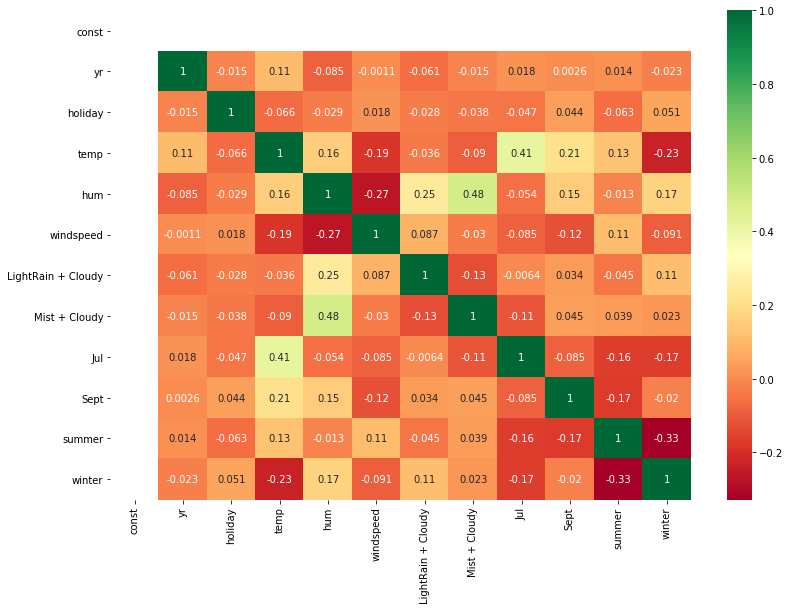

In [48]:
# Correlation Heatmap

plt.figure(figsize=(13, 9))
sns.heatmap(X_train_5.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [49]:
# Dropping 'Jul' and checking the model fit again
X_train_5 = X_train_5.drop(columns=["Jul"])

### Model 6

In [50]:
lr_6, X_train_6 = fit_model(X_train_5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 04 May 2021   Prob (F-statistic):          7.80e-190
Time:                        13:29:21   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2256      0

 - We can now see that all the P-values are 0.000 indicating all the features are significant, Checking for the VIF

In [51]:
calculate_VIF(X_train_6)

features    VIF
0                const  44.99
4                  hum   1.86
7        Mist + Cloudy   1.55
3                 temp   1.27
10              winter   1.25
6   LightRain + Cloudy   1.23
9               summer   1.19
5            windspeed   1.18
8                 Sept   1.11
1                   yr   1.03
2              holiday   1.02

 - We can see that the all the VIF values are below 2 and the model seems to be quite significant, Lets check for the correlation with the remaining variables

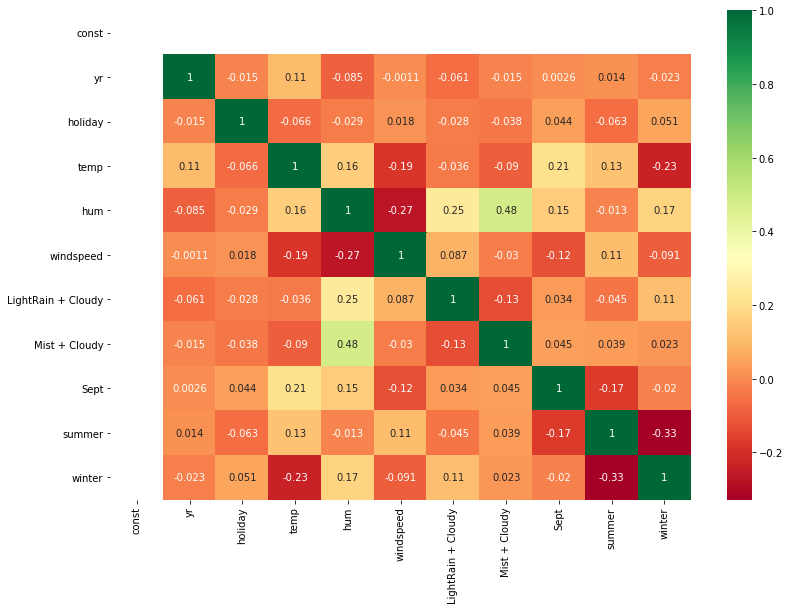

In [52]:
# Correlation Heatmap

plt.figure(figsize=(13, 9))
sns.heatmap(X_train_6.corr(), annot=True, cmap="RdYlGn")
plt.show()

 - Looking at the correlation heatmap, we can see that there is no significant positive or negative correlation among the variables

### Residual Analysis

One of the assumptions of Linear regression is that the residuals or the error terms have to follow normal distribution.

We will plot the distribution of the error terms to confirm this

Text(0.5, 0, 'Errors')

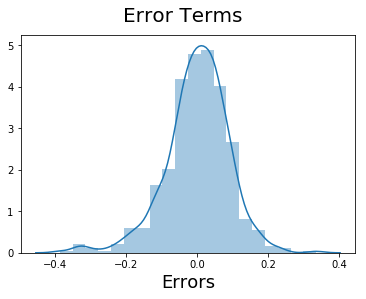

In [53]:
lm_f = sm.OLS(y_train, X_train_6).fit()
y_train_cnt= lm_f.predict(X_train_6)

# Plot the distribution of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

As we can see the curve is an inverted bell curve follows approximate normal distribution. We will also plot a QQ plot for further confirmation

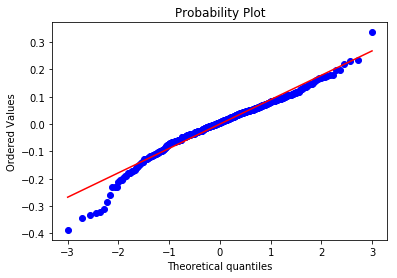

In [54]:
# Q-Q plot
import scipy

scipy.stats.probplot(y_train - y_train_cnt, dist="norm", plot=plt)
plt.show()

As we can see that the error terms follow an approximate normal distribution. We will go ahead with the Model Evaluation Part

### Model Evaluation

#### Scaling the test set

In [55]:
boom_test[numeric_cols] = scaler.fit_transform(boom_test[numeric_cols])
boom_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.837241  0.778767  0.534223   0.149393   
535   1        0           1  0.911423  0.855132  0.470417   0.231142   
299   0        0           0  0.496221  0.492359  0.777843   0.443398   
221   0        0           1  0.890387  0.805661  0.236659   0.449707   
152   0        0           0  0.821739  0.749249  0.070765   0.682387   

          cnt  LightRain + Cloudy  Mist + Cloudy  ...  Jul  Jun  Mar  May  \
184  0.704300                   0              1  ...    1    0    0    0   
535  0.725421                   0              0  ...    0    1    0    0   
299  0.278853                   0              1  ...    0    0    0    0   
221  0.545512                   0              0  ...    0    0    0    0   
152  0.569148                   0              0  ...    0    1    0    0   

     Nov  Oct  Sept  fall  summer  winter  
184    0    0     0     1       0       0  
535    0    0     0     0       1       0  
299    0    1     0     0       0       1  
221    0    0     0     1       0       0  
152    0    0     0     0       1       0  

[5 rows x 30 columns]

In [56]:
boom_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.546312    0.530942    0.508750   
std      0.500722    0.188034    0.481313    0.249189    0.228159    0.201253   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.328479    0.333829    0.358469   
50%      0.000000    0.000000    1.000000    0.546045    0.547913    0.494200   
75%      1.000000    0.000000    1.000000    0.759735    0.720622    0.651165   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  LightRain + Cloudy  Mist + Cloudy  ...  \
count  219.000000  219.000000          219.000000     219.000000  ...   
mean     0.418870    0.516216            0.027397       0.319635  ...   
std      0.188111    0.238702            0.163612       0.467403  ...   
min      0.000000    0.000000            0.000000       0.000000  ...   
25%      0.283817    0.359882            0.000000       0.000000  ...   
50%      0.402533    0.520241            0.000000       0.000000  ...   
75%      0.524362    0.682487            0.000000       1.000000  ...   
max      1.000000    1.000000            1.000000       1.000000  ...   

              Jul         Jun         Mar         May         Nov         Oct  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.105023    0.095890    0.054795    0.086758    0.073059    0.082192   
std      0.307285    0.295115    0.228100    0.282125    0.260830    0.275286   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             Sept        fall      summer      winter  
count  219.000000  219.000000  219.000000  219.000000  
mean     0.086758    0.246575    0.264840    0.232877  
std      0.282125    0.432005    0.442259    0.423633  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

#### Dividing the test set into X_test and y_test

In [57]:
y_test = boom_test.pop('cnt')
X_test = boom_test

In [58]:
# Dropping columns according to 6th Training set

X_train_6_mod = X_train_6.drop(columns=["const"])

X_test = X_test[X_train_6_mod.columns]
X_test.head()

yr  holiday      temp       hum  windspeed  LightRain + Cloudy  \
184   0        1  0.837241  0.534223   0.149393                   0   
535   1        0  0.911423  0.470417   0.231142                   0   
299   0        0  0.496221  0.777843   0.443398                   0   
221   0        0  0.890387  0.236659   0.449707                   0   
152   0        0  0.821739  0.070765   0.682387                   0   

     Mist + Cloudy  Sept  summer  winter  
184              1     0       0       0  
535              0     0       1       0  
299              1     0       0       1  
221              0     0       0       0  
152              0     0       1       0

In [59]:
# adding constant to X_test

X_test_const = sm.add_constant(X_test)
X_test_const.head()

const  yr  holiday      temp       hum  windspeed  LightRain + Cloudy  \
184    1.0   0        1  0.837241  0.534223   0.149393                   0   
535    1.0   1        0  0.911423  0.470417   0.231142                   0   
299    1.0   0        0  0.496221  0.777843   0.443398                   0   
221    1.0   0        0  0.890387  0.236659   0.449707                   0   
152    1.0   0        0  0.821739  0.070765   0.682387                   0   

     Mist + Cloudy  Sept  summer  winter  
184              1     0       0       0  
535              0     0       1       0  
299              1     0       0       1  
221              0     0       0       0  
152              0     0       1       0

In [60]:
# Predicting on test set

y_pred = lr_6.predict(X_test_const)

#### Computing R2 score

In [61]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_pred)

print(r2)

0.8039622421267125


We can see that the R-squared on the test set is 0.803 which is very near to train set R-squared which was 0.838

#### Computing adjusted R2

In [62]:
X_test_const.shape

(219, 11)

In [63]:
# n is number of rows in X
n = X_test_const.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_const.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7935447767324798

We can see that the adjusted R2 is 0.79 which is approximately equal to 0.80 which is the R2 value, indicating that there is no predictor that is insignificant to the model

In [64]:
# Plotting the spread of Y_test and y_pred

fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

NameError: name 'Y_test' is not defined

<Figure size 432x288 with 0 Axes>

### Final Model Summary

In [ ]:
lr_6.summary()

### Final Results

 - Training R-squared : 0.838
 - Training adj R-squared : 0.834
 
 - Test R-squared : 0.803
 - Test adj R_squared : 0.793
 
 
 - Equation of Best Fitted Line
 
 $ Cnt = 0.229  \times  yr - 0.098  \times  holiday + 0.57 \times temp - 0.174 \times hum - 0.186 \times windspeed + 0.089 \times summer + 0.1402 \times winter - 0.236 \times LightRain+Cloudy - 0.0518 \times Mist+Cloudy + 0.106 \times Sept $

### Hypothesis testing for Linear Regression

Null Hypothesis for Linear Regression states that,

H0 : B1 = B2 = B3 = ...... = Bn = 0 (coefficients are zero)

which means that there is no relation between the independent variables and the dependent variable

But from our final model summary, it is seen that all our coefficients are not equal to zero which means we 

#### REJECT THE NULL HYPOTHESIS


### Final Conclusion

By looking at the features and their coefficients we can get a few insights about the aspects that the company can focus on to improve their number of users

 - `yr` : As covid-19 is adversely affecting the number of users due to travel restrictions, the company should expect increase is users once the situation is back to normal
 
 - `weathersit` : Rainy or Cloudy weather adversely affects the count. Hence the company should lookout for increase in users in Clear or pleasant weather
 
 - `temp` : Users look for moderate temperature conditions for renting a bike
 
 - `holiday` : Holiday adversely affects count of users which might seem counter intuitive. But considering daily commuters for work purposes we can expect the increase in registered users thereby increasing the count of users
 
 - `season` : Company can expect an increase in count of users during Summer and winter seasons